# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline


In [2]:
# import data
data  =  pd.read_csv("datasets_master_housing_hw2.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data['median_house_value']

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [5]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [6]:
data.ocean_proximity = data.ocean_proximity.str.lower().str.replace(" " , "_")

# Explanatory Data Analysis

In [7]:
data.ocean_proximity.unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

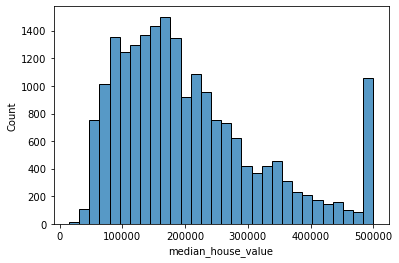

In [8]:
sns.histplot(data.median_house_value, bins  = 30)

In [9]:
log_hous_value  = np.log1p(data.median_house_value)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

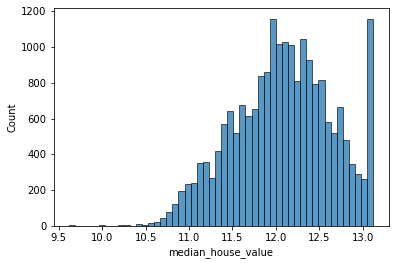

In [10]:
sns.histplot(log_hous_value, bins  = 50)

In [11]:
# histogram shows that median_house_value variable has a right-skewed distribution.

In [12]:
#keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'
data.ocean_proximity.unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [13]:
prox = ['inland', '<1h_ocean']

In [14]:
df = data[data.ocean_proximity.isin( prox ) ]
df.ocean_proximity.unique()

array(['<1h_ocean', 'inland'], dtype=object)

In [15]:
df_cols = df.columns
#len(df_cols)
df_cols 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [16]:
col = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value' ]
len(col)

9

In [17]:
set_1 = set(df_cols )
set_2 = set (col)

In [18]:
unique_elements = set_1.difference(set_2)

In [19]:
print(unique_elements )
df.columns


{'ocean_proximity'}


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [20]:
df = df.drop(columns= ['ocean_proximity'])
 

In [21]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [22]:
missing =  df.isnull().sum()
missing
# total_bedrooms 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [23]:
# What's the median (50% percentile) for variable 'population'?
df.population.median()

1195.0

# train-validation- test splitting

In [24]:
n =  len (df)
n_val =  int(n * 0.2)
n_test  = int(n * 0.2)
n_train =  n - n_val - n_test

In [25]:
print("n: ", n, "n_val: ", n_val, "n_test: ", n_test, " n_train: ", n_train)

n:  15687 n_val:  3137 n_test:  3137  n_train:  9413


In [26]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [27]:
index  = np.arange(n)

In [28]:
np.random.seed(42)
np.random.shuffle(index)

In [29]:
df_train = df.iloc[index[n_train: ] ]
df_val = df.iloc[index[n_train:n_train + n_val] ]
df_test =  df.iloc[index[n_train + n_val:] ]

In [30]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
9235,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
11104,-117.88,33.84,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
7428,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
19928,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0
15534,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,190500.0


In [31]:
len(df_train), len(df_val), len(df_test)

(6274, 3137, 3137)

In [32]:
df_train = df_train.reset_index(drop =  True)
df_val = df_val.reset_index(drop =  True)
df_test = df_test.reset_index(drop =  True)

In [33]:
df_val 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-120.09,37.02,9.0,1608.0,297.0,1057.0,295.0,3.7143,81600.0
1,-117.88,33.84,34.0,1410.0,214.0,837.0,240.0,6.1168,213900.0
2,-118.21,33.95,32.0,1116.0,328.0,1265.0,302.0,2.2950,155200.0
3,-119.32,36.32,29.0,2409.0,436.0,1142.0,440.0,3.6895,87700.0
4,-117.11,33.14,10.0,3208.0,636.0,1395.0,582.0,3.4455,190500.0
...,...,...,...,...,...,...,...,...,...
3132,-119.02,36.07,29.0,2610.0,597.0,1659.0,571.0,1.5911,60800.0
3133,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0
3134,-118.04,34.00,30.0,5308.0,854.0,2114.0,838.0,5.1985,279200.0
3135,-118.15,34.10,36.0,3514.0,818.0,2277.0,828.0,3.1211,229300.0


## Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [34]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [35]:
y_test

array([11.90969286, 12.16733701, 12.39338589, ..., 12.3647886 ,
       11.33141558, 12.50766132])

In [36]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [37]:
len(y_train)

6274

In [243]:
def train_linear_regression(X,y ):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [59]:
def rmse(y, y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [48]:
df_val.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        29
population             0
households             0
median_income          0
dtype: int64

In [180]:
#df_val.dtypes

In [91]:
bedrooms_mean = df_train.total_bedrooms.mean()

In [92]:
df_train_0 =  df_train.copy()
df_val_0 = df_val.copy()
df_test_0 = df_test.copy()

In [157]:
df_train_0 = df_train_0.fillna(0)
df_train_mean = df_train_0.fillna(bedrooms_mean)
df_val_0 = df_val_0.fillna(0)
df_val_mean  = df_val_0.fillna(bedrooms_mean)
df_test_0 = df_test_0.fillna(0)
df_test_mean =  df_test_mean.fillna(bedrooms_mean)

In [158]:
def prepare_X_0(df):
    df =  df.fillna(0)
    X = df.values
    return X

In [159]:
def prepare_X_mean(df):
    df =  df.fillna(bedrooms_mean)
    X = df.values
    return X

In [160]:
X_train_0 = prepare_X_0(df_train)

In [161]:
X_train_mean = prepare_X_mean(df_train)  

In [162]:
w0, w = train_linear_regression(X_train_0, y_train)

In [163]:
X_val_0 = prepare_X_0(df_val)

In [164]:
y_pred_0  = w0 + X_val_0.dot(w) 

In [172]:
rmse_0 = rmse(y_val, y_pred_0)
round(rmse_0, 2)

0.34

In [173]:
y_pred_0

array([11.71037285, 12.46701156, 11.82939086, ..., 12.40999882,
       12.03907284, 12.0623195 ])

In [174]:
w0_m, w_m = train_linear_regression(X_train_mean, y_train)

In [175]:
X_val_mean = prepare_X_mean(df_val)

In [176]:
y_pred_mean  = w0_m + X_val_mean.dot(w_m)

In [177]:
rmse_mean = rmse(y_val, y_pred_mean)
round(rmse_mean, 2)

0.34

In [ ]:
 # q4 r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [197]:

def train_linear_regression_reg(X, y, r=0.001   ):
    ones  =  np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv  = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [198]:
X_train  = prepare_X_0(df_train)

In [206]:
#r_values  = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
r_values  = [0, 0.000001, 0.001, 0.0001]
for r in r_values:
    w0,w = train_linear_regression_reg(X_train, y_train, r = r)
    X_val = prepare_X_0(df_val)
    y_pred = w0 + X_val.dot(w)
    print("for r ", r , " rmse is: " , round( rmse(y_val, y_pred) , 2), ", bias term is ", w0 )

for r  0  rmse is:  0.34 , bias term is  -10.141048331540206
for r  1e-06  rmse is:  0.34 , bias term is  -10.141016872331182
for r  0.001  rmse is:  0.34 , bias term is  -10.109686499756227
for r  0.0001  rmse is:  0.34 , bias term is  -10.137903397149769


In [207]:
# 0.0001  rmse is:  0.3402355418

In [205]:
r = 0.0001 
w0,w = train_linear_regression_reg(X_train, y_train, r = r)
X_val = prepare_X_0(df_val)
y_pred = w0 + X_val.dot(w)
print("for r ", r , " rmse is: " , round( rmse(y_val, y_pred) , 2), ", bias term is ", w0 )

for r  0.0001  rmse is:  0.34 , bias term is  -10.137903397149769


In [208]:
# q5

In [244]:
def train_linear_regression(X,y, r= 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [246]:
rmse_scores = []
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in seeds:
    random.seed(i)
    X_train_0 = prepare_X_0(df_train)
    w0, w = train_linear_regression(X_train_0, y_train)
    X_val_0 = prepare_X_0(df_val)
    y_pred_0  = w0 + X_val_0.dot(w) 
    rmse_0 = rmse(y_val, y_pred_0)
      
    print(f"for seed = {i} the rmse = { rmse_0}")
    
    rmse_scores.append(rmse_0)
    std =  np.std(np.array(rmse_scores))
print("std is " , std)

for seed = 0 the rmse = 0.3402352761597836
for seed = 1 the rmse = 0.3402352761597836
for seed = 2 the rmse = 0.3402352761597836
for seed = 3 the rmse = 0.3402352761597836
for seed = 4 the rmse = 0.3402352761597836
for seed = 5 the rmse = 0.3402352761597836
for seed = 6 the rmse = 0.3402352761597836
for seed = 7 the rmse = 0.3402352761597836
for seed = 8 the rmse = 0.3402352761597836
for seed = 9 the rmse = 0.3402352761597836
std is  5.551115123125783e-17


In [247]:
# q6 

In [248]:
df_full_train = pd.concat([df_train, df_val])

In [249]:
df_full_train = df_full_train.reset_index(drop = True)

In [250]:
X_full_train = prepare_X_0(df_full_train)

In [251]:
y_full_train = np.concatenate([y_train, y_val])

In [252]:
w0, w = train_linear_regression(X_full_train, y_full_train, r = 0.001)

In [253]:
w0

-10.327857359894415

In [258]:
X_test = prepare_X_0(df_test)
y_test_pred = w0 + X_test.dot(w)
rmse_score = rmse(y_test_pred, y_test)
round(rmse_score,2)

0.33

In [ ]:
# Learning and sharing
'''

https://twitter.com/AniMkrtumyan2/status/1706417262754709684


'''